## Karmaşıklık Matrisi (Confusion Matrix) Örneği

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# uyarıları kapat
import warnings
warnings.filterwarnings("ignore")

In [2]:
# veriyi oku
data = pd.read_csv("ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
# class verilerini sayısala çevirelim 
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [4]:
# class sütununu çıkaralım. Sınıfları y içine koyalım.
# y sadece etiketlerden oluşsun
y = data["class"].values
x_data = data.drop(["class"], axis = 1) 

In [5]:
# normalizasyon (min-max)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [6]:
# Eğitim test bölünmesi kütüphanesi
from sklearn.model_selection import train_test_split

In [7]:
# eğitim test ayrılması
# %15 test, %85 Eğitim
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [8]:
# Rasgele Orman Kütüphanesi
from sklearn.ensemble import RandomForestClassifier

# Eğitim - 100 karar ağacı
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

print("Rasgele Orman Modeli Test Doğruluk : {} ". format(rf.score(x_test, y_test)))

Rasgele Orman Modeli Test Doğruluk : 0.8723404255319149 


In [9]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  3],
       [ 3, 27]], dtype=int64)

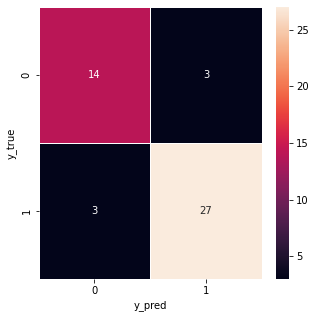

In [10]:
# Isı haritası (Heat map)
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths = 0.5,
            linecolor = "white", fmt = ".0f", ax = ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()